In [ ]:
import pandas as pd

# Read the CSV files into DataFrames
df_democratic = pd.read_csv('/content/drive/MyDrive/PP24_AllPrecinctsDemocratic.csv')
df_non_partisan = pd.read_csv('/content/drive/MyDrive/PP24_AllPrecinctsNon-partisian.csv')
df_republican = pd.read_csv('/content/drive/MyDrive/PP24_AllPrecinctsRepublican.csv')

# Now let's check for the column names in each dataset to ensure proper combination
df_democratic.columns, df_non_partisan.columns, df_republican.columns

# Since all datasets share similar column names, the concatenation should be correct.
# Concatenate the three DataFrames into combined_df
combined_df = pd.concat([df_democratic, df_non_partisan, df_republican], ignore_index=True)

# Re-displaying the combined data for clarity
combined_df.head()

,County,County Name,Election District - Precinct,Congressional,Legislative,Office Name,Office District,Candidate Name,Party,Winner,Early Votes,Election Night Votes,Mail-In Ballot 1 Votes,Provisional Votes,Mail-In Ballot 2 Votes
0,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Joe Biden,DEM,Y,3,6,11,5,0
1,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Dean Phillips,DEM,NaN,0,1,0,0,0
2,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Marianne Williamson,DEM,NaN,0,0,0,0,0
3,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Uncommitted to any Presidential Candidate,DEM,NaN,0,3,2,0,0
4,1,Allegany County,001-000,6,01C,President - Vice Pres,06,Joe Biden,DEM,Y,3,6,11,5,0


In [ ]:

# Strip any extra whitespace from column names
combined_df.columns = combined_df.columns.str.strip()

# Define the vote columns list again, now with clean column names
vote_columns = ["Early Votes", "Election Night Votes", "Mail-In Ballot 1 Votes", "Provisional Votes", "Mail-In Ballot 2 Votes"]

# Calculate the total votes
combined_df["Total Votes"] = combined_df[vote_columns].sum(axis=1)

# Display the first few rows to confirm
combined_df.head()

,County,County Name,Election District - Precinct,Congressional,Legislative,Office Name,Office District,Candidate Name,Party,Winner,Early Votes,Election Night Votes,Mail-In Ballot 1 Votes,Provisional Votes,Mail-In Ballot 2 Votes,Total Votes
0,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Joe Biden,DEM,Y,3,6,11,5,0,25
1,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Dean Phillips,DEM,NaN,0,1,0,0,0,1
2,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Marianne Williamson,DEM,NaN,0,0,0,0,0,0
3,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Uncommitted to any Presidential Candidate,DEM,NaN,0,3,2,0,0,5
4,1,Allegany County,001-000,6,01C,President - Vice Pres,06,Joe Biden,DEM,Y,3,6,11,5,0,25


In [ ]:
# find the candidate with the most votes

# Group by candidate and sum the total votes
candidate_votes = combined_df.groupby('Candidate Name')['Total Votes'].sum()

# Find the candidate with the most votes
winner = candidate_votes.idxmax()
winning_votes = candidate_votes.max()

print(f"The candidate with the most votes is {winner} with {winning_votes} votes.")

The candidate with the most votes is Joe Biden with 1183046 votes.


In [ ]:
import pandas as pd

# Assuming 'combined_df' contains your election data (from previous cells)

# Group by district and candidate, summing total votes
candidate_district_summary = combined_df.groupby(["Office District", "Candidate Name"])["Total Votes"].sum().reset_index()

# Sort candidates by highest total votes
sorted_candidate_summary = candidate_district_summary.sort_values(by="Total Votes", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(sorted_candidate_summary)

                        Office District        Candidate Name  Total Votes
0    Montgomery County Circuit Court 06   Jennifer S. Fairfax       106906
1    Montgomery County Circuit Court 06        Marybeth Ayres       106350
2                                    08          Jamie Raskin       103071
3    Montgomery County Circuit Court 06    Louis M. Leibowitz        98639
4                                    08             Joe Biden        98044
..                                  ...                   ...          ...
466                                  03  Wendell Hill-Freeman           98
467                                  03          Yasaun Young           92
468                                  03   Stewart Fred Silver           78
469                                  03           Texas Brown           60
470                                  03     Danny Craig Rupli           34

[471 rows x 3 columns]


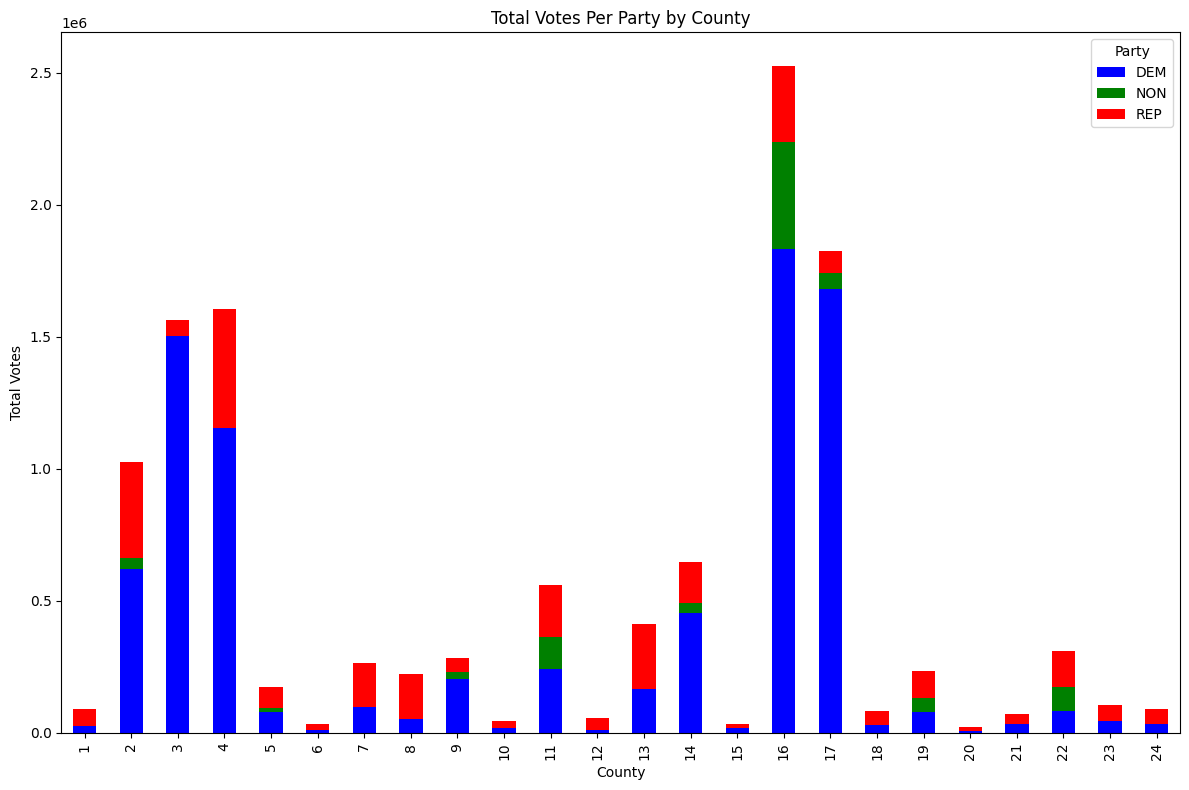

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' is already loaded as per your previous code

# Create 'votes_by_party_county' by grouping and aggregating
votes_by_party_county = combined_df.groupby(['County', 'Party'])['Total Votes'].sum().unstack(fill_value=0)

# Create the same bar chart but with specific colors for each party
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'NON': 'green'  # Assuming 'Non-partisan' is abbreviated as 'NON'
}

# Plot with specified colors
votes_by_party_county.plot(kind='bar', stacked=True, figsize=(12, 8), color=[party_colors.get(col, 'gray') for col in votes_by_party_county.columns])
plt.title("Total Votes Per Party by County")
plt.ylabel("Total Votes")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot with specified colors
plt.show()


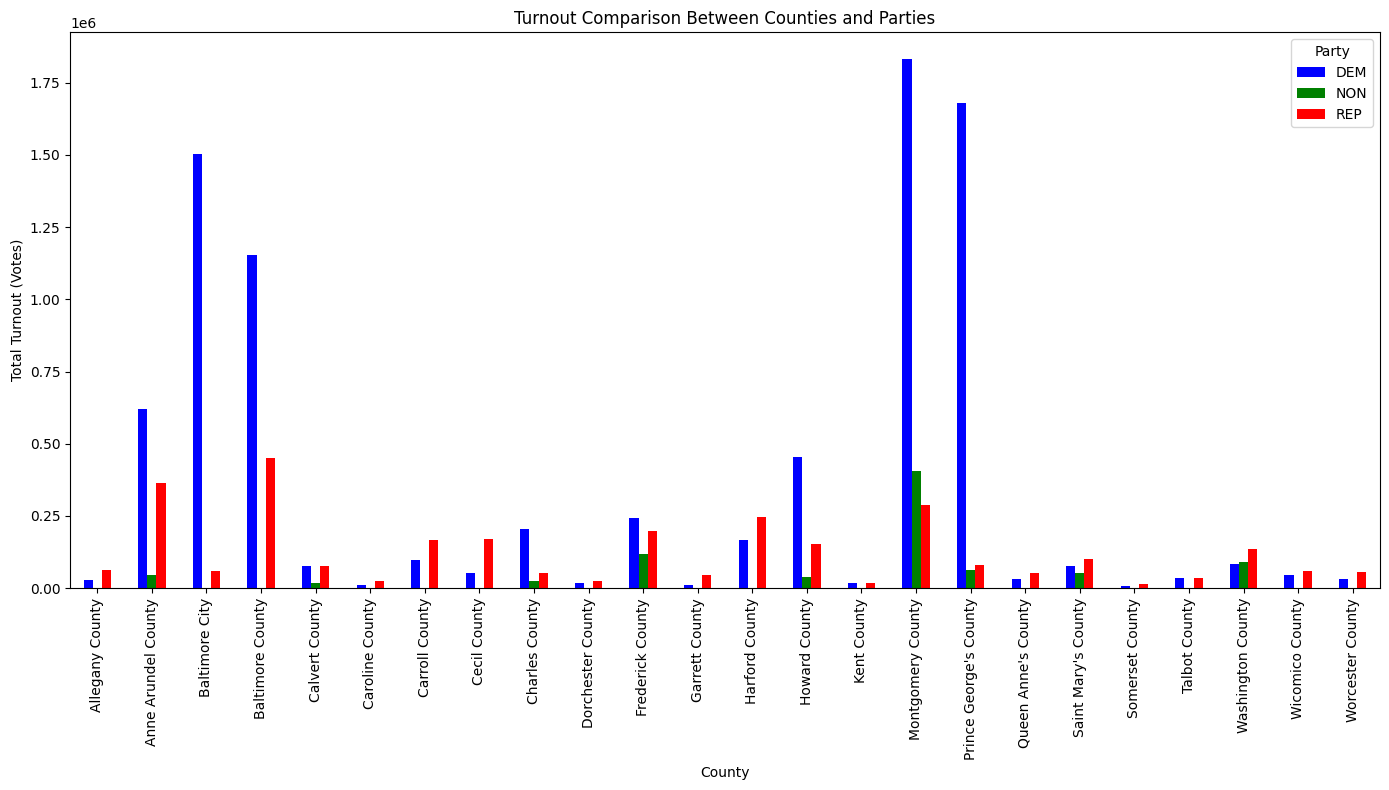

In [ ]:
# Create a new DataFrame that summarizes total votes by county and party
turnout_by_county_party = combined_df.groupby(['County Name', 'Party'])['Total Votes'].sum().unstack()

# Plot the comparison of turnout between counties and parties
turnout_by_county_party.plot(kind='bar', figsize=(14, 8), color=[party_colors.get(col, 'gray') for col in turnout_by_county_party.columns])
plt.title("Turnout Comparison Between Counties and Parties")
plt.ylabel("Total Turnout (Votes)")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.legend(title="Party")
plt.tight_layout()

# Show the comparison chart
plt.show()


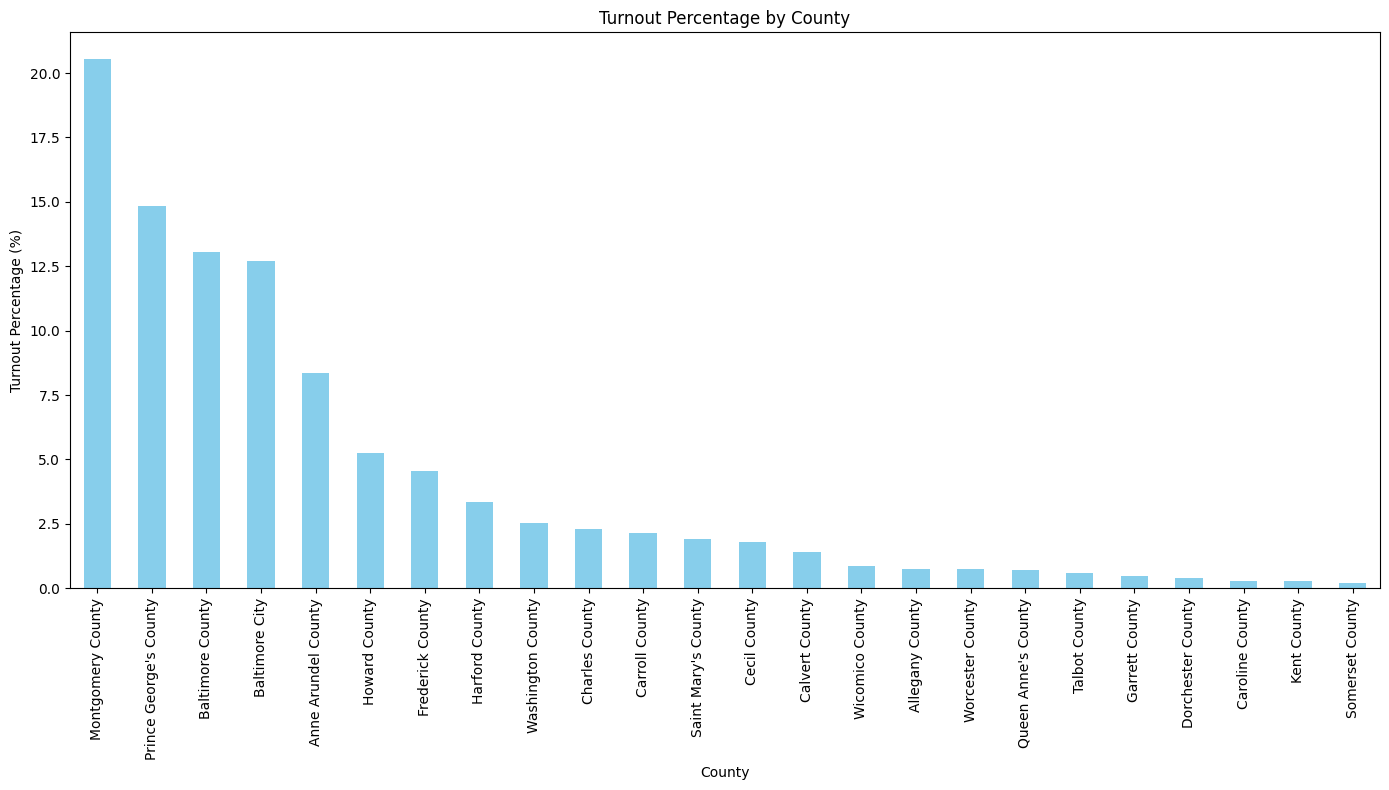

In [ ]:
# Calculate total votes per county across all parties
total_votes_per_county = combined_df.groupby('County Name')['Total Votes'].sum()

# Calculate turnout percentage for each county
turnout_percentage_by_county = (total_votes_per_county / total_votes_per_county.sum()) * 100

# Plot the turnout percentage by county
plt.figure(figsize=(14, 8))
turnout_percentage_by_county.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Turnout Percentage by County")
plt.ylabel("Turnout Percentage (%)")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the chart
plt.show()


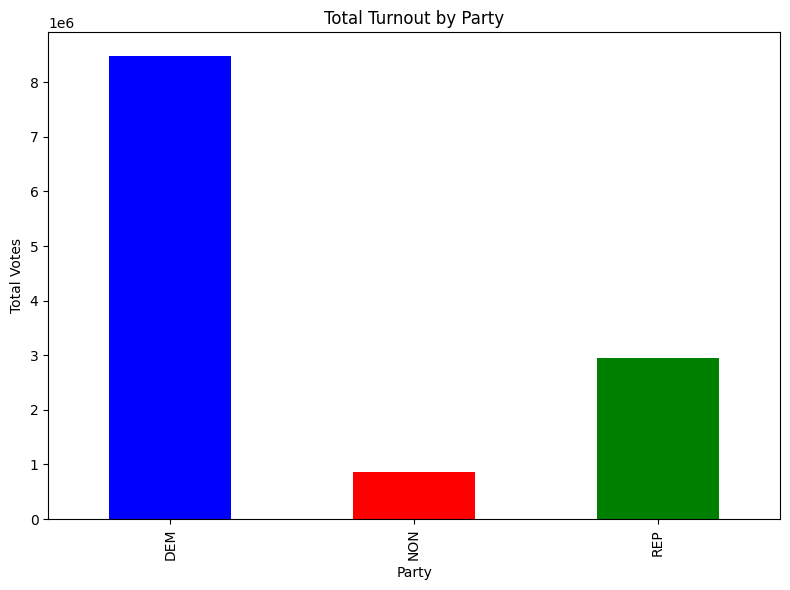

In [ ]:
# Calculate total votes for each party across all counties
total_votes_by_party = combined_df.groupby('Party')['Total Votes'].sum()

# Plot the comparison of total turnout by party
plt.figure(figsize=(8, 6))
total_votes_by_party.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title("Total Turnout by Party")
plt.ylabel("Total Votes")
plt.xlabel("Party")
plt.tight_layout()

# Show the comparison chart
plt.show()


Total votes for Joe Biden: 1183046
Total votes for Donald J. Trump: 440986


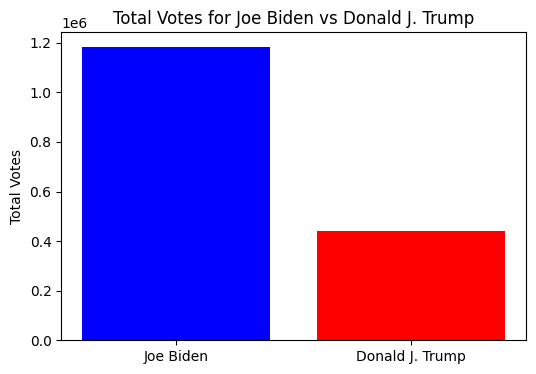

In [ ]:
# Filter the dataset for votes for Joe Biden and Donald J. Trump
biden_votes = combined_df[combined_df['Candidate Name'] == 'Joe Biden']['Total Votes'].sum()
trump_votes = combined_df[combined_df['Candidate Name'] == 'Donald J. Trump']['Total Votes'].sum()

# Display the results
print(f"Total votes for Joe Biden: {biden_votes}")
print(f"Total votes for Donald J. Trump: {trump_votes}")

# You could also create a bar chart for better visualization
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Joe Biden', 'Donald J. Trump'], [biden_votes, trump_votes], color=['blue', 'red'])
plt.title("Total Votes for Joe Biden vs Donald J. Trump")
plt.ylabel("Total Votes")
plt.show()


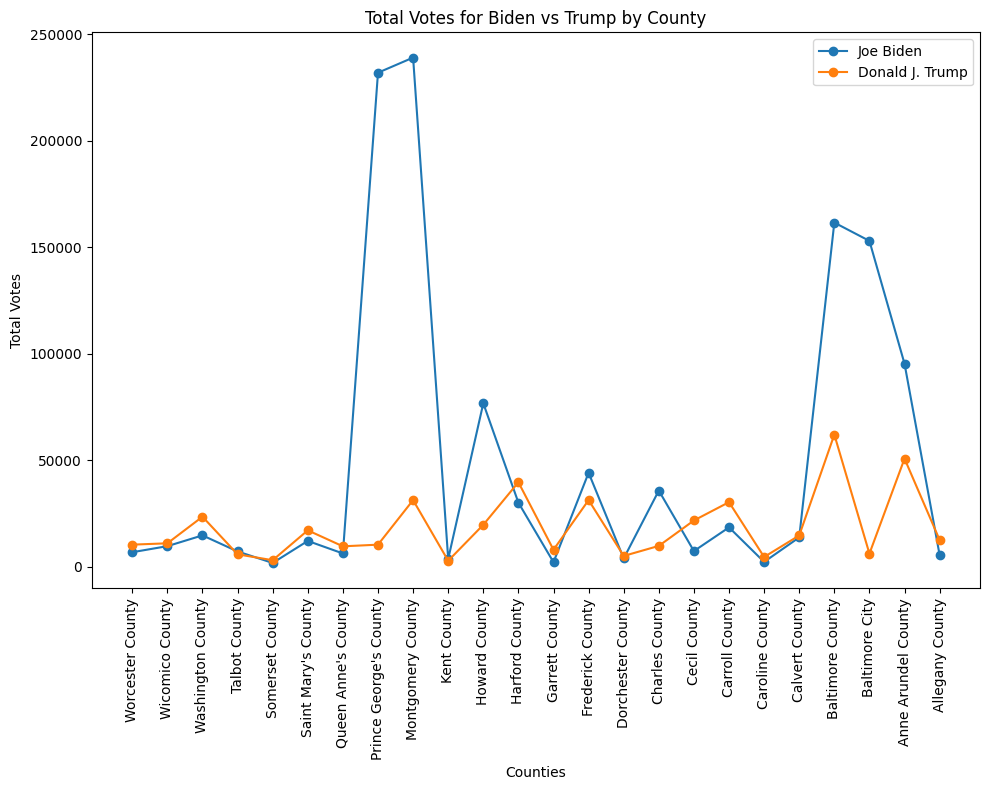

In [ ]:


# Now filtering for the top candidates Joe Biden and Donald J. Trump
top_candidates = ['Joe Biden', 'Donald J. Trump']
filtered_results = combined_df[combined_df['Candidate Name'].isin(top_candidates)]

# Group by County Name and Candidate Name, then sum total votes
top_results_by_candidate_county = filtered_results.groupby(['County Name', 'Candidate Name'])['Total Votes'].sum().reset_index()

# Pivot the data to structure it for plotting
pivot_top_results = top_results_by_candidate_county.pivot(index='County Name', columns='Candidate Name', values='Total Votes')

# Plot the sideways line plot for Biden and Trump votes by county
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for candidate in top_candidates:
    plt.plot(pivot_top_results.index, pivot_top_results[candidate], marker='o', label=candidate)

plt.title("Total Votes for Biden vs Trump by County")
plt.xlabel("Counties")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.gca().invert_xaxis()  # Make the plot sideways
plt.show()



<ipython-input-14-2e492694e9f1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presidential_data["County"] = presidential_data["County"].map(county_mapping)


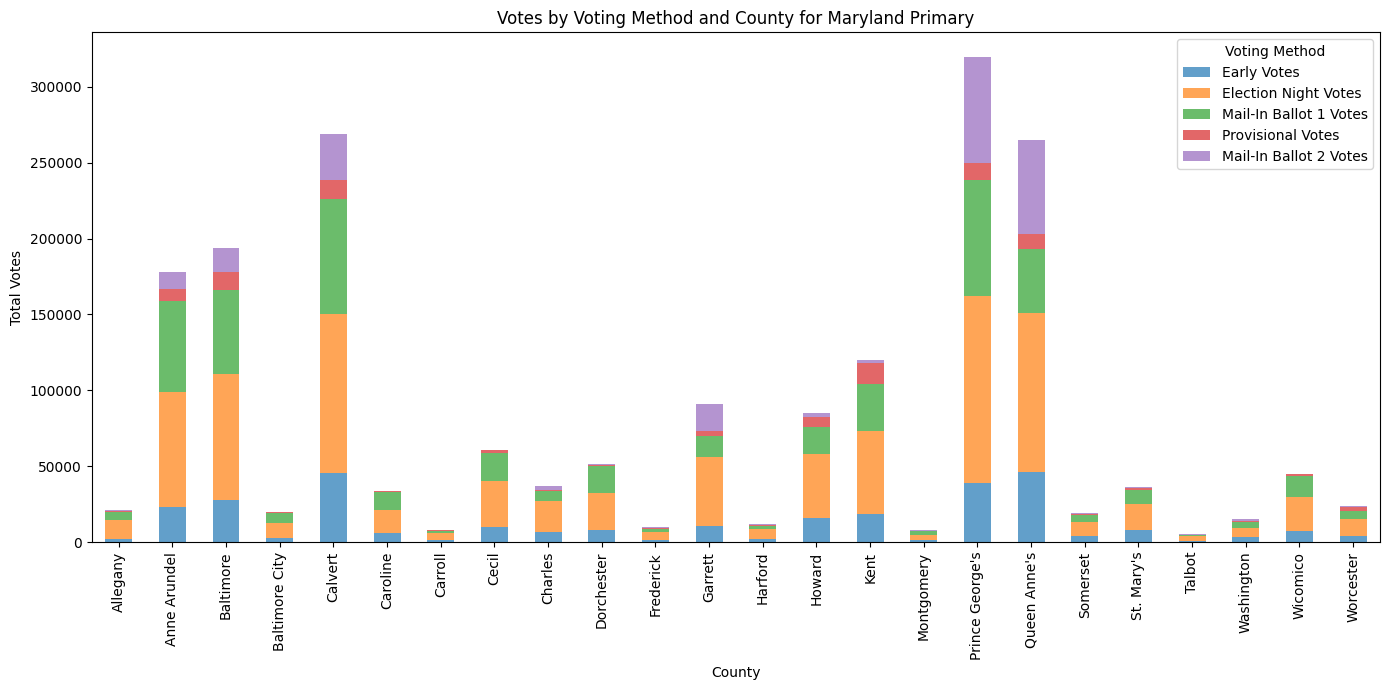

In [ ]:
import matplotlib.pyplot as plt
# Define the relevant voting methods columns
voting_methods = ['Early Votes', 'Election Night Votes', 'Mail-In Ballot 1 Votes', 'Provisional Votes', 'Mail-In Ballot 2 Votes']

# Example mapping of county IDs to county names
county_mapping = {
    1: "Allegany",
    2: "Anne Arundel",
    3: "Baltimore",
    4: "Calvert",
    5: "Caroline",
    6: "Carroll",
    7: "Cecil",
    8: "Charles",
    9: "Dorchester",
    10: "Frederick",
    11: "Garrett",
    12: "Harford",
    13: "Howard",
    14: "Kent",
    15: "Montgomery",
    16: "Prince George's",
    17: "Queen Anne's",
    18: "Somerset",
    19: "St. Mary's",
    20: "Talbot",
    21: "Washington",
    22: "Wicomico",
    23: "Worcester",
    24: "Baltimore City"
}

# Filter data for "President - Vice Pres"
presidential_data = combined_df[combined_df["Office Name"] == "President - Vice Pres"]

# Replace numeric County values with names
presidential_data["County"] = presidential_data["County"].map(county_mapping)

# Summing votes by county and voting method
voting_results_by_county = presidential_data.groupby("County")[voting_methods].sum()

# Plotting the results to show how voters voted by county
voting_results_by_county.plot(kind="bar", stacked=True, figsize=(14, 7), alpha=0.7)
plt.title("Votes by Voting Method and County for Maryland Primary")
plt.ylabel("Total Votes")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.legend(title="Voting Method")
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
# Plotting the results with a horizontal orientation (sideways)
voting_results_by_county.plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title("Votes by Voting Method and County (Sideways)")
plt.xlabel("Total Votes")
plt.ylabel("County")
plt.legend(title="Voting Method")
plt.tight_layout()

# Show the plot
plt.show()
